# ЛР №2

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['Pclass','Embarked'])

In [6]:
# Пол кодируем в 1/0
data['IsMale']=data.Sex.replace({'female':0,'male':1})
data.drop('Sex', axis = 1, inplace = True)

In [7]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


### Масштабирование значений

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


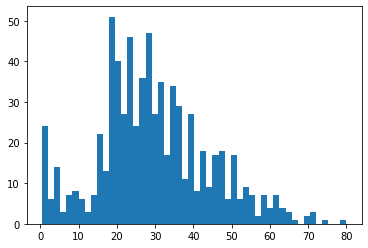

In [10]:
plt.hist(data['Age'], 50)
plt.show()

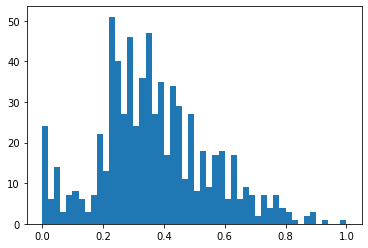

In [11]:
plt.hist(sc1_data, 50)
plt.show()

In [12]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['Cabin','Name','Ticket'], axis = 1, inplace = True)

In [13]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


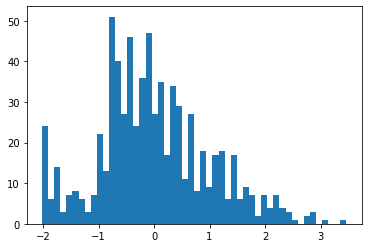

In [14]:
plt.hist(sc2_data, 50)
plt.show()

In [15]:
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,1,1
